In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ccxt

# # Load the dataset using pandas
# data1 = pd.read_csv('../datasets/training_dataset.csv')
# data = pd.read_csv('../datasets/testing_dataset.csv')

# Collecting stock historical data from yahoo
ticker = "BTC-USD"
start_date = "2018-02-01"
end_date = "2022-01-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset for inspection
print(data.head())



[*********************100%%**********************]  1 of 1 completed

                    Open          High          Low        Close    Adj Close  \
Date                                                                            
2018-02-01  10237.299805  10288.799805  8812.280273  9170.540039  9170.540039   
2018-02-02   9142.280273   9142.280273  7796.490234  8830.750000  8830.750000   
2018-02-03   8852.120117   9430.750000  8251.629883  9174.910156  9174.910156   
2018-02-04   9175.700195   9334.870117  8031.220215  8277.009766  8277.009766   
2018-02-05   8270.540039   8364.839844  6756.680176  6955.270020  6955.270020   

                 Volume  
Date                     
2018-02-01   9959400448  
2018-02-02  12726899712  
2018-02-03   7263790080  
2018-02-04   7073549824  
2018-02-05   9285289984  


In [7]:
X_features = ['Open', "Volume"]
target_column = 'Close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_test = data[X_features]
y_test = data[target_column]

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1430, 2)
Shape of X_test: (1430, 2)
Shape of y_train: (1430,)
Shape of y_test: (1430,)


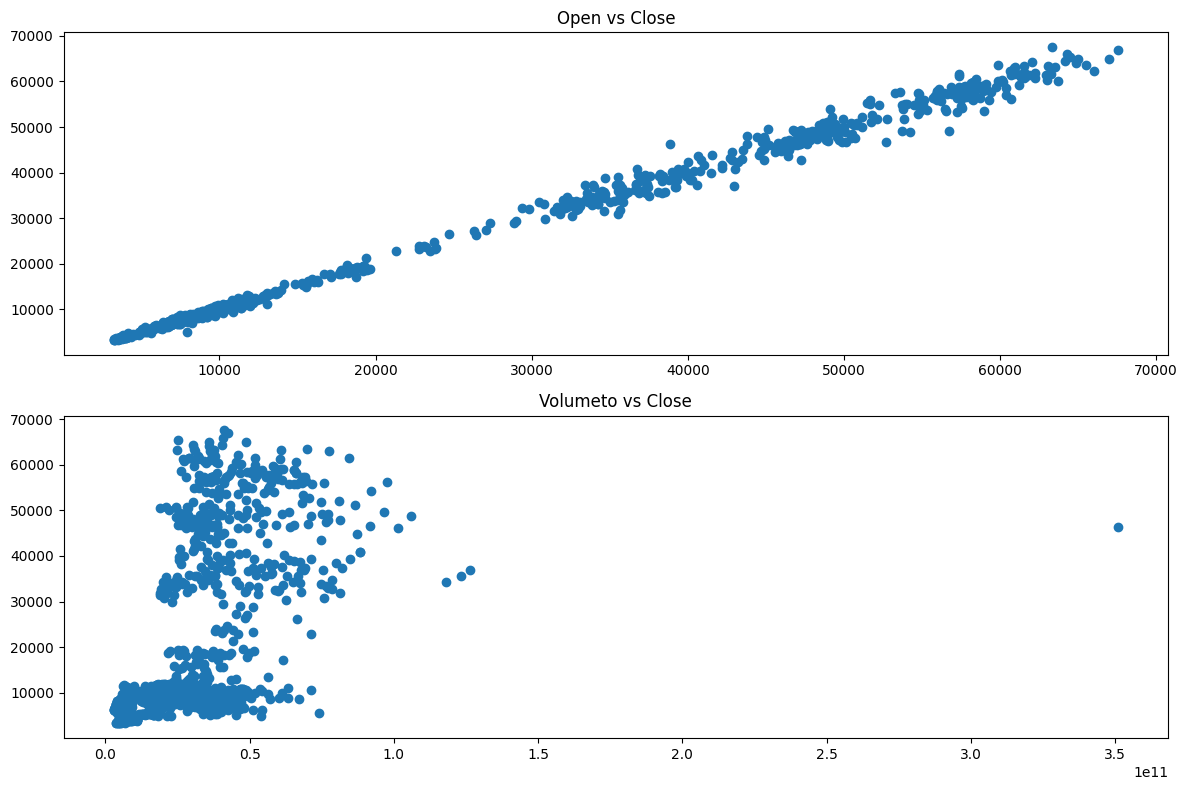

In [8]:
fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(X_train['Open'], y_train)
axs[0].set_title('Open vs Close')

axs[1].scatter(X_train['Volume'], y_train)
axs[1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [10]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [ 9.99410154e-01 -7.95265351e-10], b = 53.692530383483245


Training MSE: 1023837.5875798702


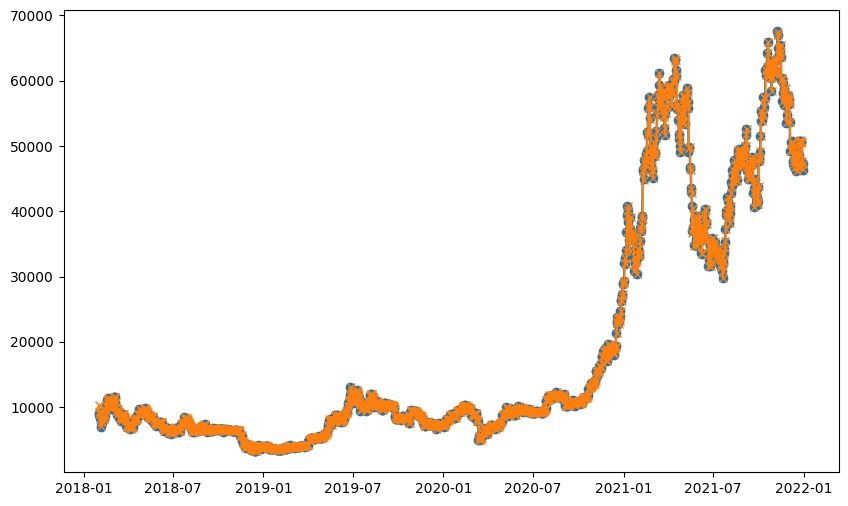

In [11]:
from sklearn.metrics import mean_squared_error

predictions = linear_model.predict(X_test).tolist()

time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column,y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column,predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE: {train_mse}")
plt.show()

Training MSE for quadratic polynomial: 11066088.926521081


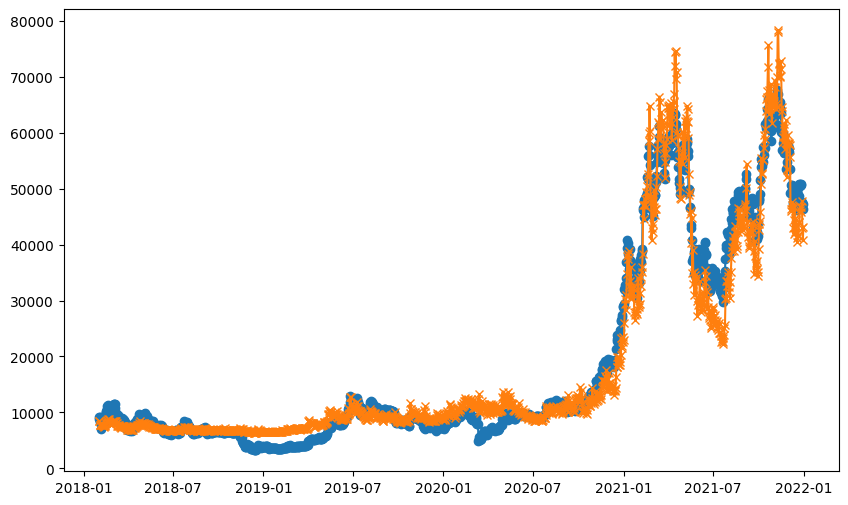

In [12]:
poly_features = PolynomialFeatures(2)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for quadratic polynomial: {train_mse}")
plt.show()

Training MSE for cubic polynomial: 36428090.088552766


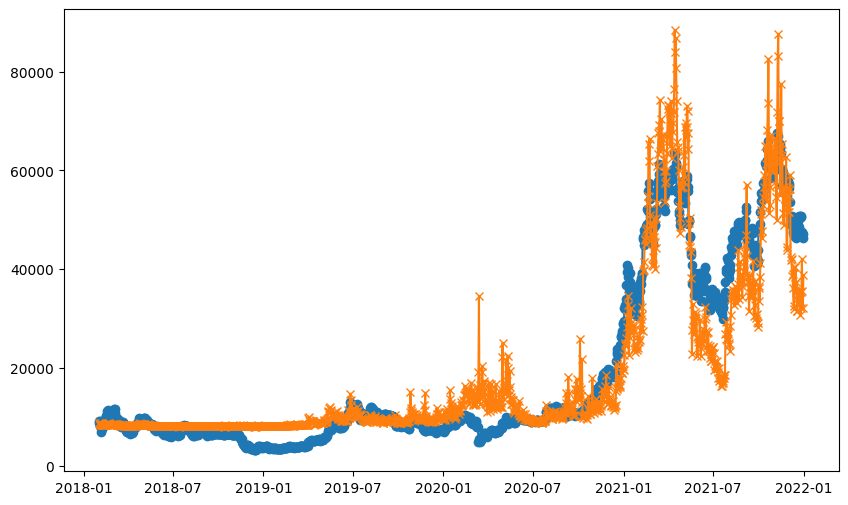

In [13]:
poly_features = PolynomialFeatures(3)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()
time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for cubic polynomial: {train_mse}")
plt.show()

Training MSE for degree 4 polynomial: 87946295.31702809


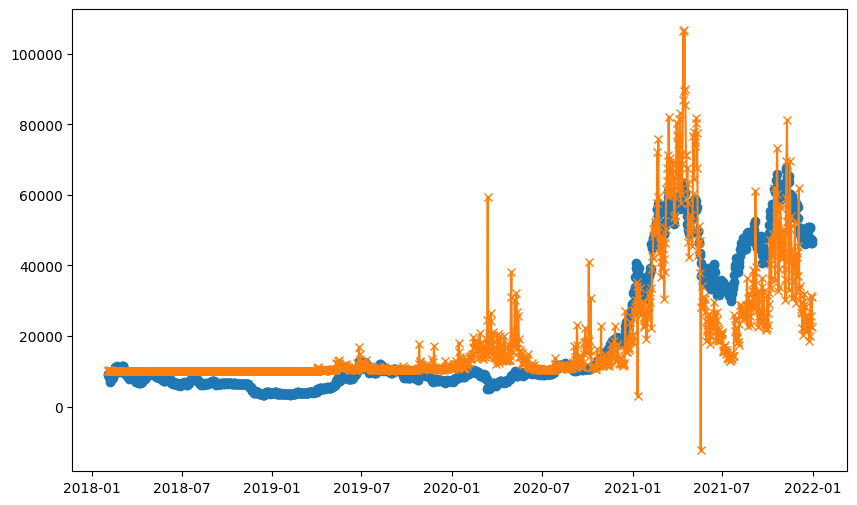

In [14]:
poly_features = PolynomialFeatures(4)
X_train_poly = poly_features.fit_transform(X_train)

# Create and fit the quadratic regression model
quadratic_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
quadratic_model.fit(X_train, y_train)

predictions = quadratic_model.predict(X_test).tolist()

time_column =data.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column, y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE for degree 4 polynomial: {train_mse}")
plt.show()

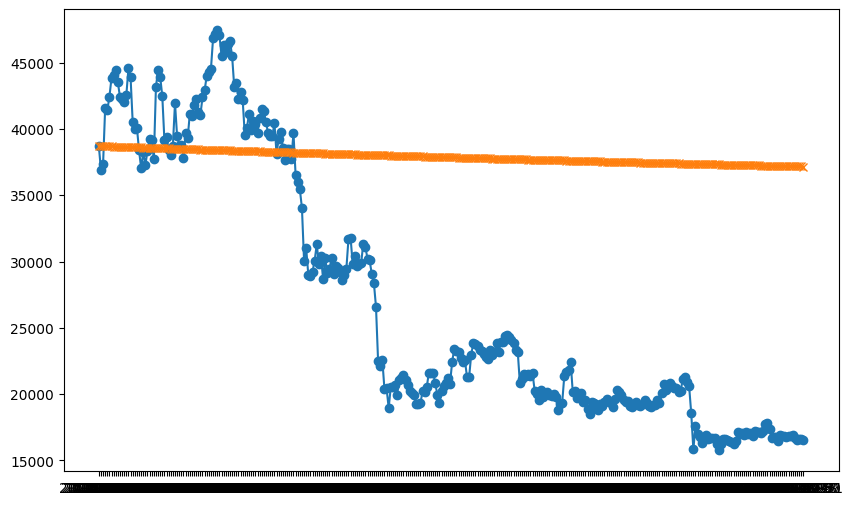

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('../datasets/open_predicted_values.csv')
data2 = pd.read_csv('../datasets/testing_dataset.csv')

time_column = data1['time']
plt.figure(figsize=(10, 6))
plt.plot(time_column, data2['close'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column, data1['close'], label='Predicted', marker='x')